# SciPy

`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. 

Dirigida al mismo tipo de usuarios que los de aplicaciones como MATLAB, GNU Octave, y Scilab, `SciPy` contiene varios módulos, entre ellos:

* Funciones especiales ([scipy.special](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html))
* Integración ([scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html))
* Optimización ([scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html))
* Interpolación ([scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html))
* Transformadas de Fourier ([scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html))
* Procesado de señales ([scipy.signal](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html))
* Algebra lineal ([scipy.linalg]())
* Problemas de valores propios con matrices dispersas [(ARPACK)](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html)
* Grafos ([scipy.sparse.csgraph](https://docs.scipy.org/doc/scipy/reference/tutorial/csgraph.html))
* Análisis espacial: ([scipy.spatial](https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html))
* Estadística ([scipy.stats]())
* Tratamiento de imágenes multidimensionales ([scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html))
* Entrada y salida de archivos ([scipy.io](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html))


En esta clase nos vamos repasar brevemente algunas de las funcionalidades más relevantes para el análisis de datos. Pero antes, carguemos las librerías de NumPy y matplotlib que ya conocemos.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## File input/output: scipy.io

Este módulo de SciPy permite leer y escribir archivos de datos en una gran variedad de formatos [(ver documentación)](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io).

Por ejemplo, para trabajar con __datos de MATLAB (*.dat):__


In [2]:
from scipy import io as spio
a = np.ones((3, 3)) # creamos una matriz de 3x3 

In [3]:
spio.savemat('archivo.mat', # nombre del archivo
             {'a': a}) # asignamos y referenciamos el nombre con un diccionario 

Así de sencillo, ya hemos "exportado" los valores de la variable 'a' a un archivo en formato `*.mat`.

Veamos si podemos localizarlo:

In [4]:
%ls *.mat

 Volume in drive C has no label.
 Volume Serial Number is 6C01-77DB

 Directory of C:\Users\SERVER\Desktop\Curso_AeroPython-master\notebooks_completos

31/05/2017  18:15               256 archivo.mat
30/05/2017  20:54               256 file.mat
               2 File(s)            512 bytes
               0 Dir(s)  31,325,294,592 bytes free


Imaginemos la situación inversa. ¿Cómo importar archivos de datos de MATLAB a Python

In [5]:
data = spio.loadmat('archivo.mat')
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Podemos listar los variables importadas:

In [6]:
spio.whosmat('archivo.mat')

[('a', (3, 3), 'double')]

Existen otras formas de cargar datos:
* Datos de archivos de texto: [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt) | [`numpy.savetxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt)
* Datos de archivos de texto incompletos: [`numpy.genfromtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt) | `numpy.recfromcsv()`
* Datos con formato NumPy-binario (eficiente): [`numpy.save()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html#numpy.save) | [`numpy.load`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html#numpy.load)
* [`pandas.read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html): que cubriremos en detalle más tarde

# Estadística: [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

Este módulo contiene un gran número de __distribuciones de probabilidad__, tanto continuas como discretas, así como un creciente número de __funciones estadísticas__. 

Veamos un ejemplo simple tomado de Jake VanderPlas y su charla ([Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers)). Queremos saber si dos sets de muestras son diferentes (a y b).

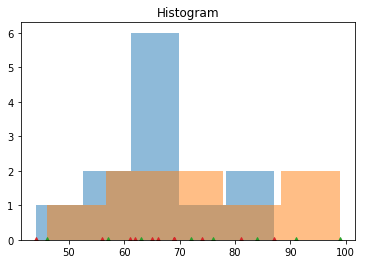

In [7]:
a = np.array([84, 72, 57, 46, 63, 76, 99, 91])
b = np.array([81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69])

plt.hist(b, bins=5, alpha=0.5)  
plt.hist(a, bins=5, alpha=0.5)  

plt.plot(a,np.zeros(len(a)),'^')
plt.plot(b,np.zeros(len(b)),'^')

plt.title("Histogram")
plt.show()

In [8]:
print("La media de 'a' es {0:.1f}, y su desviación estándar es {1:.1f}".format(a.mean(), a.std()))
print("La media de 'b' es {0:.1f}, y su desviación estándar es {0:.1f}".format(b.mean(), b.std()))

print("La diferencia entre las medias es de {0:.1f}".format(a.mean()- b.mean()))

La media de 'a' es 73.5, y su desviación estándar es 16.6
La media de 'b' es 66.9, y su desviación estándar es 66.9
La diferencia entre las medias es de 6.6


Vaya, parece que para estas muestras los histogramas no nos muestran información clara tampoco. Asumiendo que las muestras son representativas, podemos realizar la prueba de [t de Student](https://es.wikipedia.org/wiki/Prueba_t_de_Student) para ver si existen diferencias significativas entre ellas.

In [9]:
from scipy import stats

stats.ttest_ind(a,b)

Ttest_indResult(statistic=1.0217439456499446, pvalue=0.32043898199741466)

Podemos ver que el valor de $\frac{p}{2} > 0.05 $ por lo que la hipótesis nula se cumple (no existen diferencias significativas entre ellas).

__Ejercicio:__
Si las muestras no son diferentes, no debería importar si intercambiamos los valores de forma aleatoria, ¿verdad?.
¡Comprobémoslo!

In [10]:
samples = np.concatenate([a,b])

num_simulations = 10000

differences = np.zeros(num_simulations)

for i in range(num_simulations):
    np.random.shuffle(samples)
    a_new = samples[0:len(a)]
    b_new = samples[len(a):len(samples)]
    a_mean = a_new.mean()
    b_mean = b_new.mean()
    differences[i]= (a_mean-b_mean)

Ahora que hemos realizado nuestras simulaciones, podemos calcular nuestro valor $p$, que es simplemente la proporción de simulaciones que resultaron en una diferencia mayor o igual a 6.6 (la diferencia original)

In [11]:
p = np.sum(differences>(a.mean()-b.mean()))/num_simulations
p

0.1588

$$ p = \frac{N_{>6.6}}{N_{total}} = \frac{1512}{10000} = 0.15 $$

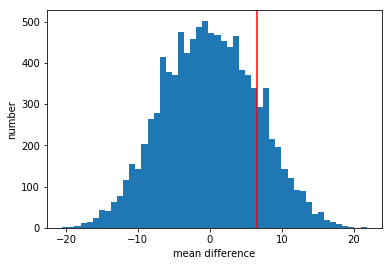

In [12]:
plt.hist(differences, bins=50)
plt.axvline((a.mean()-b.mean()),color='r')
plt.xlabel('mean difference')
plt.ylabel('number')

Este [tutorial de `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) muestra más ejemplos que podemos realizar. Por el momento, vamos a continuar explorando `SciPy`. Retomaremos más trabajo estadísitco cuando lleguemos a  `pandas`, 

## Interpolación: scipy.interpolate

Una de las tareas fundamentales a las que nos enfrentaremos a diario en el análisis de datos es la de **interpolar**.

Supongamos que tenemos una serie de puntos que representan los datos de un cierto experimento. Por simplicidad, vamos a generar unos puntos de una función $\sin{x}$ de ejemplo para explicar el funcionamiento.

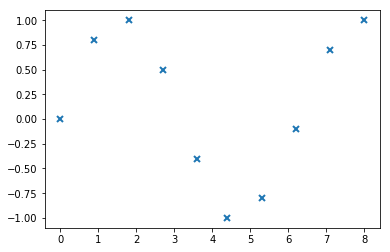

In [13]:
x_i = [0.0, 0.9, 1.8, 2.7, 3.6, 4.4, 5.3, 6.2, 7.1, 8.0]
y_i = [0.0, 0.8, 1.0, 0.5, -0.4, -1.0, -0.8, -0.1, 0.7, 1.0]
plt.plot(x_i, y_i, 'x', mew=2)

Para interpolar utilizaremos el paquete `interpolate` de SciPy:

In [14]:
from scipy import interpolate



Para crear una **función interpolante** utilizaremos el objeto `InterpolatedUnivariateSpline` del paquete `interpolate`. A este objeto solo hay que pasarle los puntos de interpolación y el grado, y generará un *spline*.

In [15]:
f_interp = interpolate.InterpolatedUnivariateSpline(x_i, y_i, k=1)
f_interp

¿Cómo obtengo los puntos desde aquí? El resultado que hemos obtenido es una *función* y admite como argumento la $x$.

In [16]:
f_interp(np.pi / 2)

array(0.949065850398866)

Vamos a representar esta función junto con los puntos de interpolación. Fíjate en que, ahora que tenemos una función interpolante, podemos representarla en un dominio:

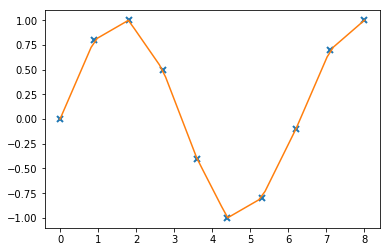

In [17]:
x = np.linspace(0, 8)
y_interp = f_interp(x)

plt.plot(x_i, y_i, 'x', mew=2)
plt.plot(x, y_interp)

Retrocede ahora y comprueba lo que pasa si cambias el grado del *spline*. Dale a un vistazo a todas las opciones que SciPy ofrece para [interpolar datos](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

## Ajuste

El ajuste funciona de manera totalmente distinta a la interpolación: obtendremos una curva que no pasará por ninguno de los puntos originales, pero que a cambio tendrá una expresión analítica simple que conocemos a priori.

Veamos un ejemplo simple para realizar ajustes polinómicos vamos a utilizar el paquete `np.polynomial.polynomial` (sí, está dos veces).

In [18]:
from numpy.polynomial import polynomial

Generaremos unos datos para ver cómo funcionaría, del tipo:

$$y(x) = x^2 - x + 1 + \text{ruido}$$

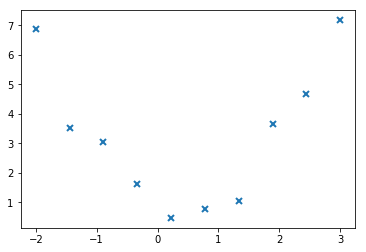

In [19]:
x_i = np.linspace(-2, 3, num=10)
y_i = x_i ** 2 - x_i + 1 + 0.5 * np.random.randn(10)
plt.plot(x_i, y_i, 'x', mew=2)

Utilicemos ahora la función `polynomial.polyfit`, que recibe los puntos de interpolación y el grado del polinomio. El resultado serán los coeficientes del mismo, **en orden de potencias crecientes**.

In [20]:
a, b, c = polynomial.polyfit(x_i, y_i, deg=2)
a, b, c

(0.93858045839412252, -0.85758680673919563, 0.99297011721213613)

¡Muy similares a lo que esperábamos! Para evaluar un polinomio con estos coeficientes, o bien construimos la función nosotros mismos o usamos la función `polynomial.polyval`:

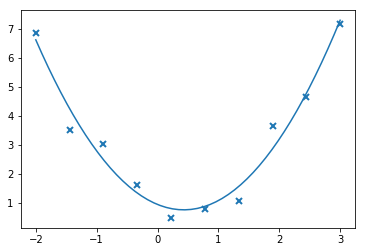

In [21]:
x = np.linspace(-2, 3)
#y_fit = a + b * x + c * x ** 2
y_fit = polynomial.polyval(x, (a, b, c))

l, = plt.plot(x, y_fit)
plt.plot(x_i, y_i, 'x', mew=2, c=l.get_color())


Si la función que queremos ajustar es más compleja, necesitaremos ajustar los datos a una curva mediante un algoritmo de optimización.

In [27]:
from scipy.optimize import curve_fit

Generemos una vez más los datos añadiendo un poco de ruído. ¿Puedes leer ya funciones descritas con NumPy?

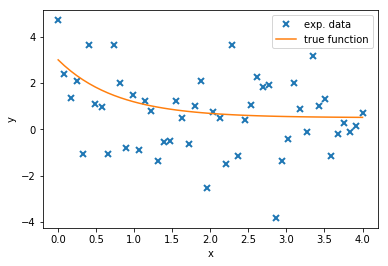

In [28]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

a, b, c = 2.5, 1.3, 0.5

xdata = np.linspace(0, 4, 50)
y = func(xdata, a, b, c)
y_noise = 1.5 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata, 'x',mew=2, label='exp. data')
plt.plot(xdata, func(xdata, a, b, c), '-', label='true function')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
popt, pcov = curve_fit(func, xdata, ydata)

popt

array([ 3.66166679,  4.55900945,  0.4156104 ])

Como en este ejemplo sintético conocemos los valores exactos, podemos ver que existe variación respecto a los valores originales debido al ruído añadido.

Normalmente es mejor ayudar al solver definiendo unas restricciones:

In [30]:
popt_bounds, pcov_bounds = curve_fit(func, xdata, ydata,
                                     bounds=([1, 1, 0], [3., 2., 1.]))
popt_bounds

array([ 2.76887238,  2.        ,  0.28374616])

Veamos los resultados en una gráfica:

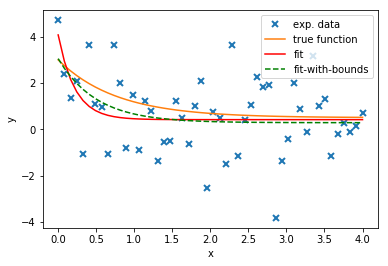

In [31]:
plt.plot(xdata, ydata, 'x',mew=2, label='exp. data')
plt.plot(xdata, func(xdata, a, b, c), '-', label='true function')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.plot(xdata, func(xdata, *popt_bounds), 'g--', label='fit-with-bounds')
         
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Otra forma de ajustar una función a datos experimentales es minimizando el error por mínimos cuadrados. Para hacer este ejemplo más interesante, añadamos además de valores atípicos (*outliers*, en inglés). Este ejemplo está tomado del [Cookbook de Scipy, robust regression](http://scipy-cookbook.readthedocs.io/items/robust_regression.html)

In [32]:
def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma*t) * np.sin(omega*t)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] = error[outliers] * 35
    return y + error

# Parametros del modelo
A = 2
sigma = 0.1
omega = 0.1 * 2 * np.pi

x_true = np.array([A, sigma, omega])

noise = 0.1

t_min = 0
t_max = 30

Una vez creado el modelo estamos listos para generar los datos.

In [33]:
t= np.linspace(t_min, t_max, 30)
y_exp = generate_data(t, A, sigma, omega, noise=noise, n_outliers=4)
y_true = generate_data(t, A, sigma, omega) # ¿por qué no necesito indicar nada más?

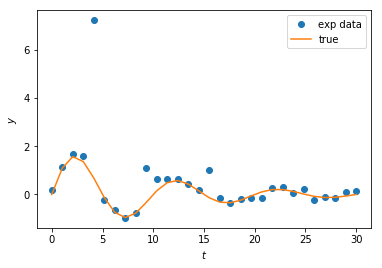

In [34]:
plt.plot(t, y_exp, 'o', label='exp data')
plt.plot(t, y_true, label='true')

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()

La función que calcula los residuos se puede definir como:

In [35]:
def fun_res(x, t, y):
    A, sigma, omega = x # parámetros 
    return (A * np.exp(-sigma * t) * np.sin(omega * t)) - y

In [36]:
x0 = np.ones(3) # valores inciales de A, sigma y omega

Ya tenemos todo lo que necesitamos para realizar el ajuste por mínimos cuadrados

In [37]:
from scipy.optimize import least_squares

In [40]:
res_lsq = least_squares(fun_res, x0, args=(t, y_exp))
res_lsq

 active_mask: array([ 0.,  0.,  0.])
        cost: 20.618312918181669
         fun: array([-0.17640523,  0.76447001,  1.04037792,  0.94695461, -5.4964679 ,
        0.91057655,  0.41548639,  0.16667058, -0.20602915, -1.95344785,
       -1.17414516, -0.77896351, -0.49824218, -0.12091195,  0.15744534,
       -0.75621123,  0.31493199,  0.38247255,  0.12742557,  0.02171344,
        0.02703026, -0.35426389, -0.32869198, -0.04825782, -0.21036475,
        0.26911888,  0.16301251,  0.16361172, -0.07706227, -0.15236019])
        grad: array([  3.08580324e-08,  -6.91921470e-03,  -1.25705412e-02])
         jac: array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.36772753e-01,  -1.96125965e+00,   3.20357227e+00],
       [  6.23218740e-01,  -5.59693223e+00,   2.85783741e+00],
       [  5.83616611e-01,  -7.86191696e+00,  -6.08555645e-01],
       [  3.96641793e-01,  -7.12423122e+00,  -5.15738219e+00],
       [  1.57564709e-01,  -3.53759819e+00,  -8.48891479e+00],
       [ -5.272

In [41]:
res_robust = least_squares(fun_res, x0,
                           loss='soft_l1', # Norma del tipo L1 (más robusta)
                           f_scale=0.1, # restringe los errores
                           args=(t, y_exp))
res_robust

 active_mask: array([ 0.,  0.,  0.])
        cost: 1.0367100631952038
         fun: array([ -1.76405235e-01,   4.95865621e-02,   2.49611413e-02,
        -1.21354949e-01,  -6.48524298e+00,   9.34715733e-02,
        -1.37421354e-01,  -3.93016563e-02,  -3.33705153e-02,
        -1.45800772e+00,  -5.02133878e-01,  -1.28534393e-01,
        -5.49881494e-02,   4.69951179e-03,  -3.57218004e-02,
        -1.16705201e+00,  -1.53617359e-01,   1.45319969e-02,
        -3.68010855e-02,   8.13421062e-02,   2.52694962e-01,
        -6.67128279e-02,  -8.65879904e-02,   7.53887082e-02,
        -2.24513218e-01,   1.48738874e-01,  -1.34003716e-03,
         2.08085337e-02,  -1.53123443e-01,  -1.48826202e-01])
        grad: array([ -5.76608029e-10,  -3.91112594e-07,   1.81869782e-07])
         jac: array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.60518124e-01,  -1.03601396e+00,   1.36476431e+00],
       [  7.42581391e-01,  -3.34112663e+00,   9.32519517e-01],
       [  3.41629728e-01, 

Veamos los resultados:

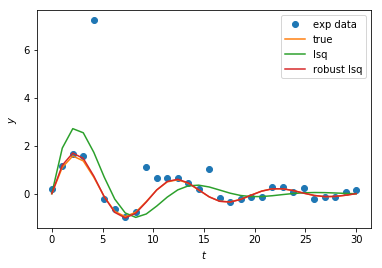

In [42]:
y_lsq = generate_data(t, *res_lsq.x)
y_robust = generate_data(t, *res_robust.x)

plt.plot(t, y_exp, 'o', label='exp data')
plt.plot(t, y_true, label='true')
plt.plot(t, y_lsq, label='lsq')
plt.plot(t, y_robust, label='robust lsq')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()

El paquete `optimize` incluye multitud de métodos para **optimización**, **ajuste de curvas** y **búsqueda de raíces**. La ayuda de este paquete es bastante larga (puedes consultarla también en http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html).

# Procesado de señales ([scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal))

Afrontémoslo, lo habitual es que tus datos tengan siempre un ruído asociado y no dispongamos de un modelo al que ajustarlos a priori. Bajo esta situación se suelen optar por diferentes técnicas para filtrar la señal.

Primero generaremos una señal con ruído:

In [43]:
N = 100 # number of samples

T = 1./N # sample spacing

t = np.linspace(-1, N*T, N)
y = (np.sin(
    2*np.pi*0.75*t*(1-t) + 2.1) +
    0.1*np.sin(2*np.pi*1.25*t + 1) +
    0.18*np.cos(2*np.pi*3.85*t)
    )

t_exp = (t + 1)
y_exp = y + np.random.randn(len(t)) * 0.30 # ruído

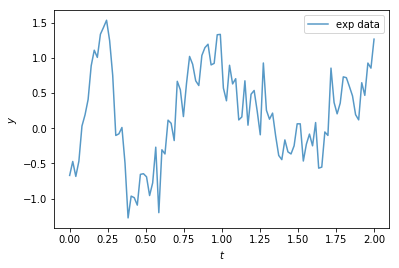

In [44]:
plt.plot(t_exp, y_exp, label='exp data', alpha=0.75)

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()

Lo más sencillo en estos casos es aplicar un filtro por ventana:

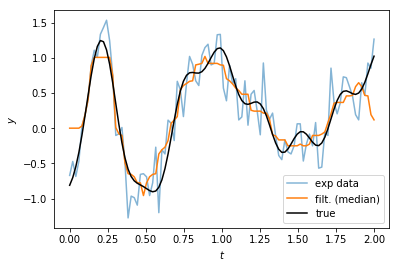

In [45]:
from scipy.signal import medfilt

n_elements = 11 # nº de elementos de en el que se aplica el filtro 
y_exp_filt = medfilt(y_exp, n_elements)

plt.plot(t_exp, y_exp, label='exp data', alpha=0.55)
plt.plot(t_exp, y_exp_filt, label='filt. (median)')
plt.plot(t_exp, y, '-k', label='true', )

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()

Como podemos ver, si la frecuencia de muestreo no es muy alta o el tamaño de nuestra ventana no es el adecuado, el resultado puede ser no satisfactorio.

El filtro de [Savitzky–Golay](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) suele ser interesante en estos casos.


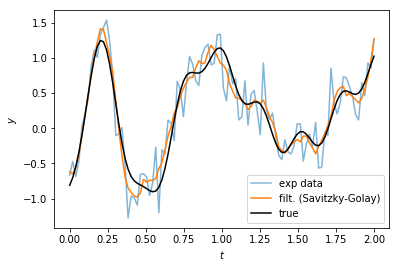

In [46]:
from scipy.signal import savgol_filter

n_elements = 11 # nº de elementos de en el que se aplica el filtro 
polyorder = 3

y_exp_filt = savgol_filter(y_exp, n_elements, polyorder)

plt.plot(t_exp, y_exp, label='exp data', alpha=0.55)
plt.plot(t_exp, y_exp_filt, label='filt. (Savitzky-Golay)')
plt.plot(t_exp, y, '-k', label='true', )

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()

Si estamos interesados en obtener una señal sinuisidal y dado que el ruído ocurre a una frecuencia más alta, otra opción es generar filtro de paso bajo.

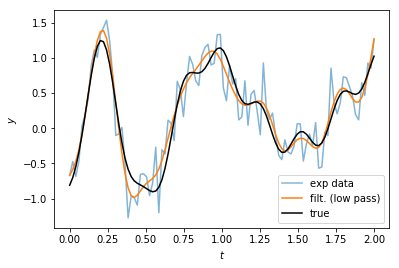

In [47]:
from scipy import signal

filt_order = 3 # Filter order
Wn = 0.2 # # Cutoff frequency [rad·s^-1]

# Create the filter
b, a = signal.butter(filt_order, Wn, btype='low')
w, h = signal.freqs(b, a)

# Second, apply the filter
y_exp_lowpass = signal.filtfilt(b,a, y_exp)

plt.plot(t_exp, y_exp, label='exp data', alpha=0.55)
plt.plot(t_exp, y_exp_lowpass, label='filt. (low pass)')
plt.plot(t_exp, y, '-k', label='true', )

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()


Por último, si la señal tiene un deriva (drifting) podemos corregirla fácilmente con:

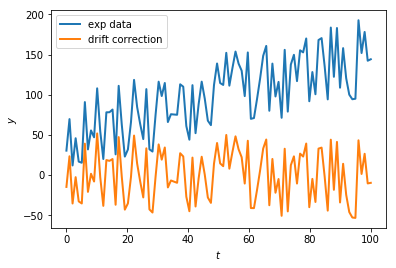

In [52]:
from scipy import signal

N = 100

t0 = 0
tf = 100

m = 1
b = 0

t = np.linspace(t0, tf, N)
y = m*t+b

y_exp = y + 100* np.random.rand(N)


plt.plot(t, y_exp, linewidth=2, label='exp data') 

plt.plot(t, signal.detrend(y_exp), linewidth=2, label='drift correction') 
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()

---
<br/>
<h4 align="right">¡Síguenos en Twitter!
<br/>
<p align="right"> <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">@AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> </p>
<p align="right"><a href="https://twitter.com/CAChemEorg" class="twitter-follow-button" data-show-count="false">@CAChemEorg</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> </p>
<br/></h4>

###### Este notebook ha sido realizado por: [Álex Sáez](https://www.linkedin.com/in/alejandrosaezm/) y [Francisco Navarro](https://www.linkedin.com/in/fjnavarro/)
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso de introducción a Python: procesamiento y análisis de datos</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez, Alejandro Sáez Mollejo y Francisco J. Navarro Brull</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

###### La mayor parte de material de este curso es un resumen adaptado del magnífico [Curso de AeroPython](https://github.com/AeroPython/Curso_AeroPython)  realizado por: Juan Luis Cano  y Álex Sáez 